In [45]:
import pandas as pd
import os
import matplotlib.pyplot as plt


# Path to your local parquet files
DATA_DIR = "../data/processed/2025"

# List all .parquet files
all_files = [os.path.join(DATA_DIR, f) for f in os.listdir(DATA_DIR) if f.endswith(".parquet")]

# Load a sample file
df = pd.read_parquet(all_files[0])

print(f"Loaded {all_files[0]}")
df.head()


Loaded ../data/processed/2025/01009099999.parquet


,date,temp,max_temp,min_temp,station_id
0,2025-01-01,14.2,18.0,10.4,01009099999
1,2025-01-03,22.4,27.1,16.5,01009099999
2,2025-01-04,24.4,26.6,22.3,01009099999
3,2025-01-05,19.5,20.7,19.0,01009099999
4,2025-01-06,17.3,18.7,16.3,01009099999


In [46]:
dfs = [pd.read_parquet(f) for f in all_files]
df_all = pd.concat(dfs, ignore_index=True)
df_all

,date,temp,max_temp,min_temp,station_id
0,2025-01-01,14.2,18.0,10.4,01009099999
1,2025-01-03,22.4,27.1,16.5,01009099999
2,2025-01-04,24.4,26.6,22.3,01009099999
3,2025-01-05,19.5,20.7,19.0,01009099999
4,2025-01-06,17.3,18.7,16.3,01009099999
...,...,...,...,...,...
73046,2025-07-13,66.4,71.8,62.8,01465099999
73047,2025-07-14,67.3,70.5,63.5,01465099999
73048,2025-07-15,66.5,70.5,61.0,01465099999
73049,2025-07-16,68.6,72.9,63.7,01465099999


In [47]:
# Example: Temperature above 30°C
hot_days = df_all[df_all["temp"] > 30]

# Group by station to find avg temperature
avg_temp_by_station = df_all.groupby("station_id")["temp"].mean().sort_values(ascending=False)

# Filter by a specific date range
filtered = df_all[(df_all['date'] >= "2025-06-01") & (df_all['date'] <= "2025-07-01")]


In [48]:
hot_days.head()

,date,temp,max_temp,min_temp,station_id
26,2025-02-02,33.6,36.0,31.8,01009099999
27,2025-02-03,32.1,34.0,30.9,01009099999
30,2025-02-06,30.3,32.7,28.8,01009099999
112,2025-05-09,31.1,36.1,27.9,01009099999
113,2025-05-10,33.5,35.2,30.7,01009099999


In [49]:
avg_temp_by_station.head()

station_id
02443099999    63.800000
02605099999    59.636842
02628099999    56.200000
02449099999    54.700000
02347099999    54.200000
Name: temp, dtype: float64

In [50]:
filtered.head()

,date,temp,max_temp,min_temp,station_id
134,2025-06-01,24.5,26.1,22.8,01009099999
135,2025-06-02,27.0,29.7,23.0,01009099999
136,2025-06-03,31.0,34.0,28.9,01009099999
137,2025-06-04,29.9,30.7,28.8,01009099999
138,2025-06-06,29.0,29.8,28.0,01009099999


*Top 10 Stations with the Highest Recorded Max Temperature

In [51]:
top_max_temp = df_all[["station_id", "date", "max_temp"]].sort_values("max_temp", ascending=False).dropna().head(10)
top_max_temp

,station_id,date,max_temp
58924,01271099999,2025-07-17,94.1
39390,01232099999,2025-07-17,94.1
50313,01293099999,2025-07-16,93.7
20606,01133099999,2025-07-15,93.6
30190,02651099999,2025-07-02,93.2
56159,01290099999,2025-07-17,93.2
20608,01133099999,2025-07-17,92.8
23305,01424099999,2025-07-12,92.8
12511,01237099999,2025-07-17,92.7
65545,01277099999,2025-07-17,92.7


*Top 10 Coldest Days Across All Stations (Min Temp)

In [52]:
coldest_days = df_all[["station_id", "date", "min_temp"]].sort_values("min_temp").dropna().head(10)
coldest_days

,station_id,date,min_temp
11055,02720099999,2025-02-04,-38.9
28852,02719099999,2025-02-04,-36.0
6972,02764099999,2025-02-04,-35.9
55575,02717099999,2025-01-05,-33.7
55574,02717099999,2025-01-04,-33.5
55605,02717099999,2025-02-04,-33.3
55604,02717099999,2025-02-03,-32.8
11054,02720099999,2025-02-03,-32.4
23542,01082099999,2025-02-04,-32.1
23515,01082099999,2025-01-08,-31.5


In [55]:
df_all["temp_swing"] = df_all["max_temp"] - df_all["min_temp"]
top_swing = df_all.sort_values("temp_swing", ascending=False).head(10)
top_swing[["date", "station_id", "max_temp", "min_temp", "temp_swing"]]


,date,station_id,max_temp,min_temp,temp_swing
52537,2025-03-18,02745099999,37.4,-13.0,50.4
55575,2025-01-05,02717099999,15.8,-33.7,49.5
53075,2025-02-02,02702099999,30.0,-18.9,48.9
47838,2025-01-13,01447099999,40.8,-7.1,47.9
28894,2025-03-18,02719099999,37.4,-10.1,47.5
47058,2025-01-05,01058099999,20.3,-26.7,47.0
38612,2025-01-13,01392099999,38.7,-8.1,46.8
39045,2025-02-20,01088299999,30.2,-16.6,46.8
39000,2025-01-06,01088299999,21.2,-25.6,46.8
2830,2025-02-20,01265099999,29.1,-17.7,46.8


/tmp/ipykernel_28266/4092013525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swing["temp_swing"] = df_swing["max_temp"] - df_swing["min_temp"]


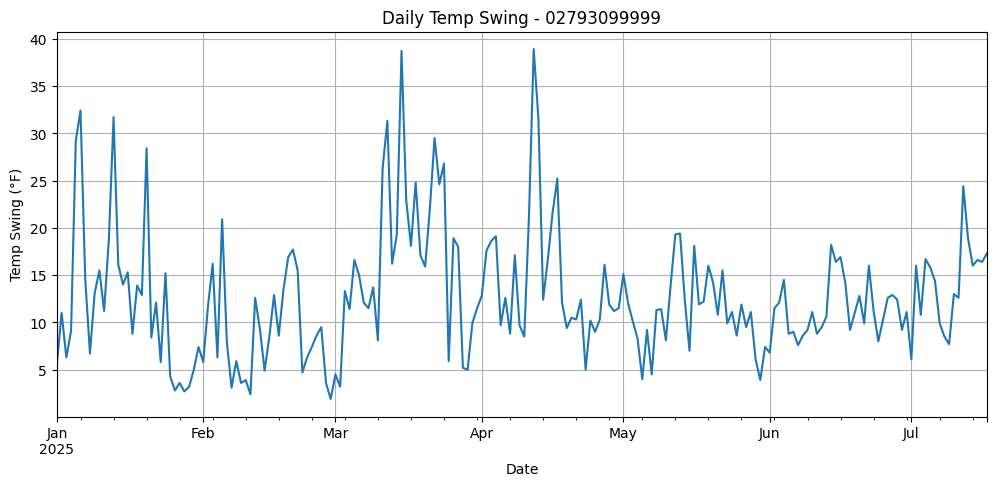

In [56]:
swing_station = "02793099999"
df_swing = df_all[df_all["station_id"] == swing_station]
df_swing["temp_swing"] = df_swing["max_temp"] - df_swing["min_temp"]

df_swing.set_index("date")["temp_swing"].plot(figsize=(12,5), title=f"Daily Temp Swing - {swing_station}")
plt.xlabel("Date")
plt.ylabel("Temp Swing (°F)")
plt.grid(True)
plt.show()


In [59]:
very_hot_days = df_all[df_all["temp"] > 80]
hot_counts = very_hot_days.groupby("station_id").size().sort_values(ascending=False).head(5)
hot_counts


station_id
01470399999    1
dtype: int64

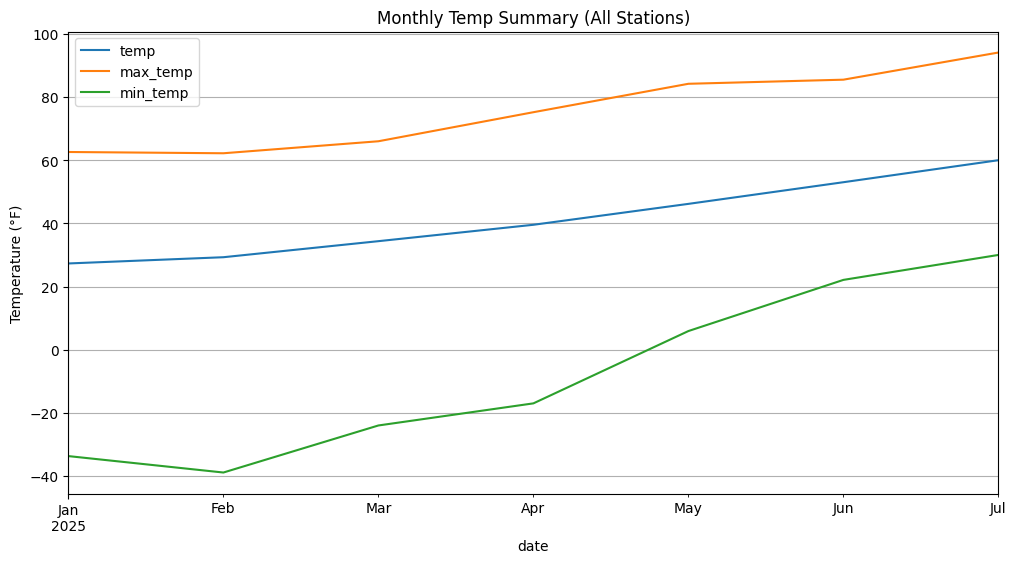

In [60]:
monthly_stats = df_all.set_index("date").resample("ME").agg({
    "temp": "mean",
    "max_temp": "max",
    "min_temp": "min"
})

monthly_stats.plot(figsize=(12, 6), title="Monthly Temp Summary (All Stations)")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.show()


In [61]:
df_all.isnull().sum().sort_values(ascending=False)


temp_swing    100
max_temp       91
min_temp       85
date            0
temp            0
station_id      0
dtype: int64

In [62]:
station_counts = df_all["station_id"].value_counts().head(10)
station_counts

station_id
01465099999    198
02722099999    198
02751099999    198
02267099999    198
01329099999    198
01476099999    198
01122099999    198
01406099999    198
01257099999    198
02759099999    198
Name: count, dtype: int64

In [63]:
abnormal_swing_days = df_all[df_all["temp_swing"] > 40].sort_values("temp_swing", ascending=False)
abnormal_swing_days[["date", "station_id", "temp_swing", "max_temp", "min_temp"]].head(10)

,date,station_id,temp_swing,max_temp,min_temp
52537,2025-03-18,02745099999,50.4,37.4,-13.0
55575,2025-01-05,02717099999,49.5,15.8,-33.7
53075,2025-02-02,02702099999,48.9,30.0,-18.9
47838,2025-01-13,01447099999,47.9,40.8,-7.1
28894,2025-03-18,02719099999,47.5,37.4,-10.1
47058,2025-01-05,01058099999,47.0,20.3,-26.7
38612,2025-01-13,01392099999,46.8,38.7,-8.1
39045,2025-02-20,01088299999,46.8,30.2,-16.6
2830,2025-02-20,01265099999,46.8,29.1,-17.7
39000,2025-01-06,01088299999,46.8,21.2,-25.6


In [65]:
df_all.groupby("station_id")["temp"].mean().sort_values(ascending=False).head(1)

station_id
02443099999    63.8
Name: temp, dtype: float64

<Axes: title={'center': 'Monthly Average Temperature'}, xlabel='date', ylabel='Temperature(*F)'>

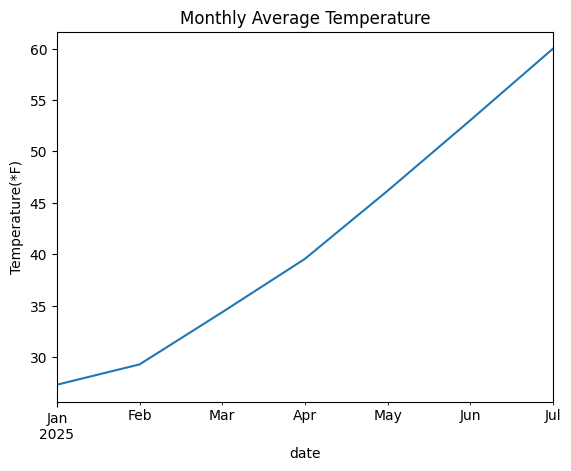

In [53]:
df_all['date'] = pd.to_datetime(df_all['date'])
monthly_avg = df_all.set_index("date").resample("ME")["temp"].mean()

monthly_avg.plot(title="Monthly Average Temperature", ylabel="Temperature(*F)")

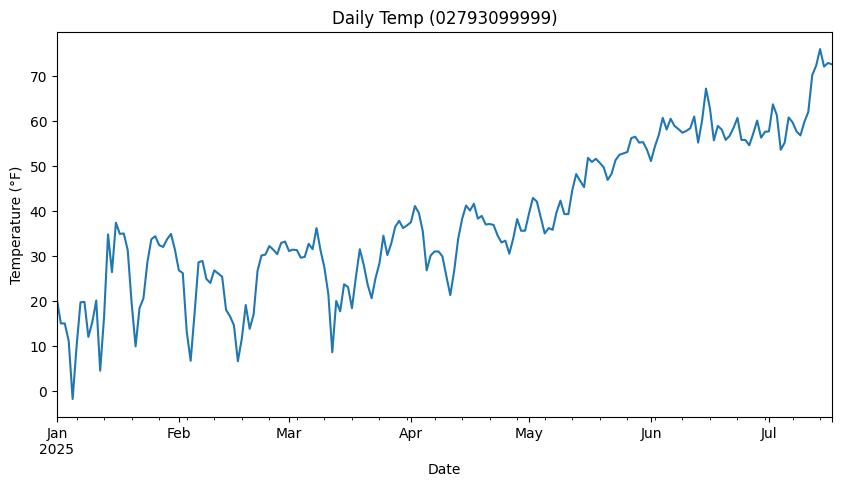

In [54]:
# Plot daily average temperature of a station
station_df = df_all[df_all["station_id"] == "02793099999"]
station_df.set_index("date")["temp"].plot(figsize=(10,5), title="Daily Temp (02793099999)")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()
